# 회귀분석(Regression)
- 데이터를 이용하여 함수식(Y=aX+b)를 구한다.
- 기울기(DL:weight) 와 절편(DL:Bias)을 DataSet으로 최적값을 구한다.
              (정답과 오차율의 차이가 제일 적은 것으로 선택 --> 인공신경망으로 발전)
- 기울기와 절편으로 Y값을 예측할 수 있다.

### 단순회귀 분석 : Y = aX+b

In [1]:
regression <- read.csv("../Data//regression.csv")

head(regression)

age,Height,Weight
0~3Months,59.1,5.9
3~6Months,66.7,8.0
6~9Months,71.4,8.9
9~12Months,75.0,10.1
12~18Months,80.1,10.9
2Year,87.8,13.2


In [2]:
tail(regression)

,age,Height,Weight
26,30~34Year,171.3,71.5
27,35~39Year,170.7,72.3
28,40~49Year,168.6,70.6
29,50~59Year,166.1,69.1
30,60~69Year,164.4,65.9
31,70YearOver,162.4,61.1


In [3]:
str(regression)

'data.frame':	31 obs. of  3 variables:
 $ age   : Factor w/ 31 levels "0~3Months","10Year",..: 1 16 24 30 4 15 19 21 23 26 ...
 $ Height: num  59.1 66.7 71.4 75 80.1 ...
 $ Weight: num  5.9 8 8.9 10.1 10.9 13.2 14.8 16.7 19.1 21.5 ...


In [4]:
# 기본통계량 확인

summary(regression)

          age         Height          Weight     
 0~3Months  : 1   Min.   : 59.1   Min.   : 5.90  
 10Year     : 1   1st Qu.:105.7   1st Qu.:17.90  
 11Year     : 1   Median :150.7   Median :45.20  
 12~18Months: 1   Mean   :135.8   Mean   :42.62  
 12Year     : 1   3rd Qu.:169.8   3rd Qu.:66.65  
 13Year     : 1   Max.   :173.8   Max.   :72.30  
 (Other)    :25                                  

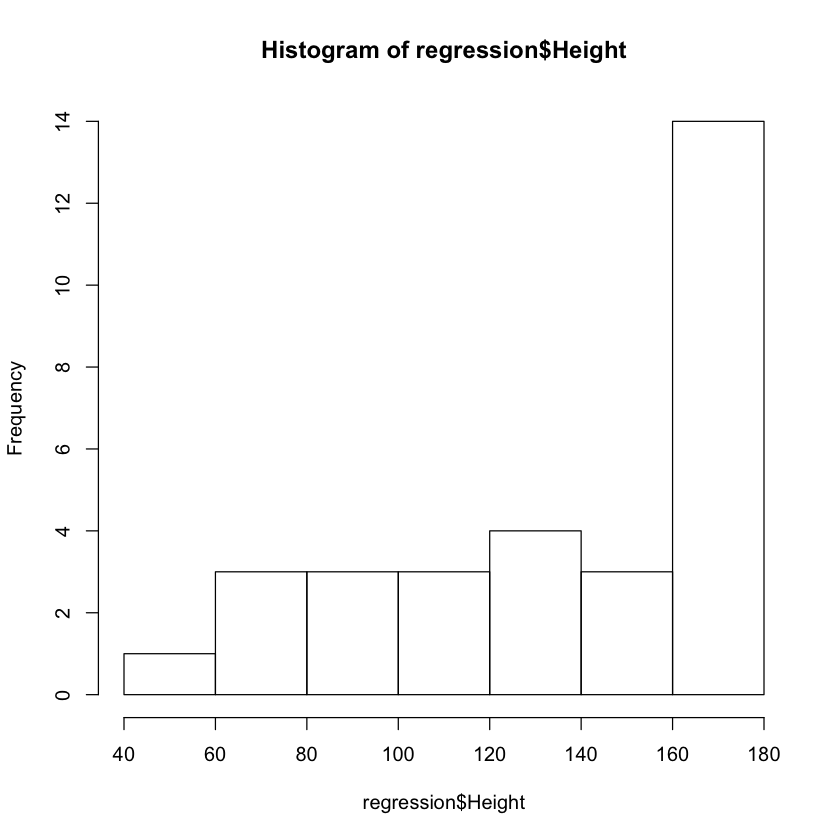

In [5]:
hist(regression$Height)

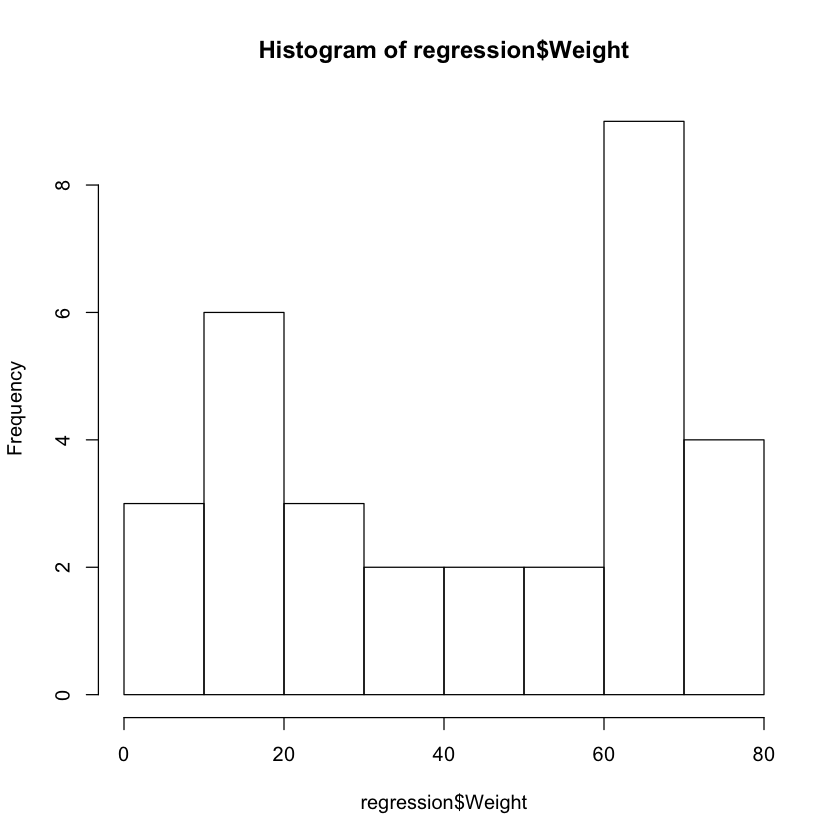

In [6]:
hist(regression$Weight)

In [7]:
cor(regression$Height, regression$Weight)

[1] 0.9672103

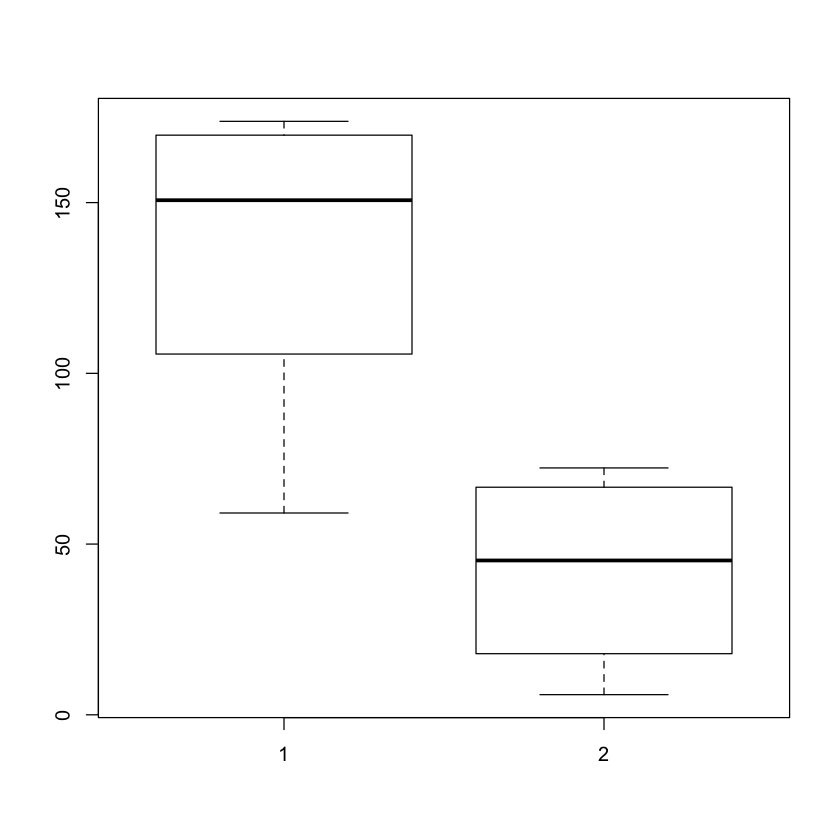

In [8]:
boxplot(regression$Height, regression$Weight)

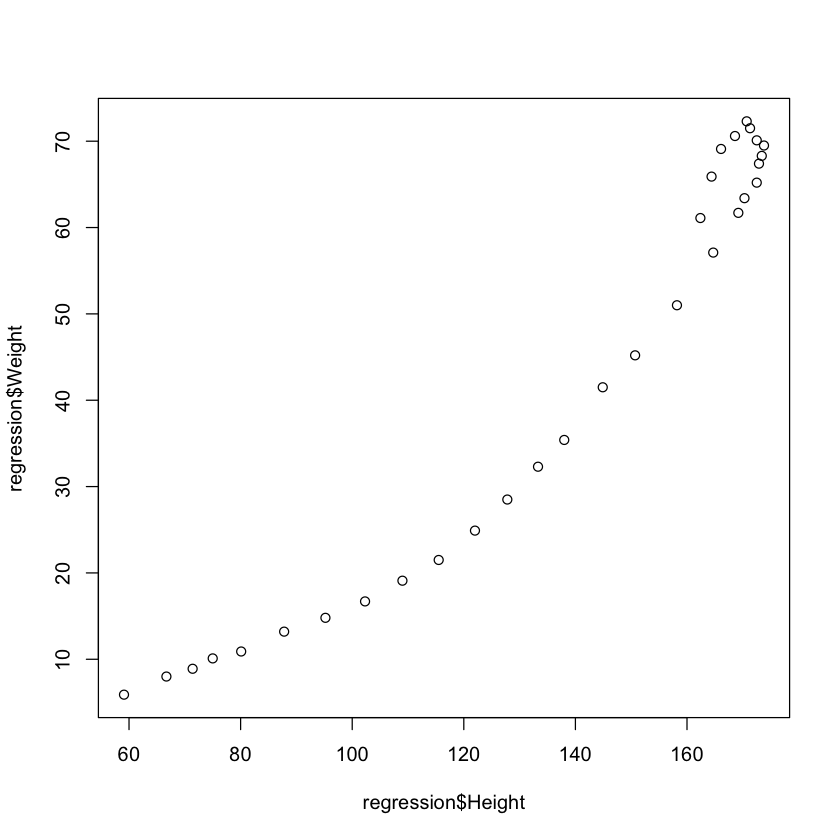

In [9]:
plot(regression$Height, regression$Weight)

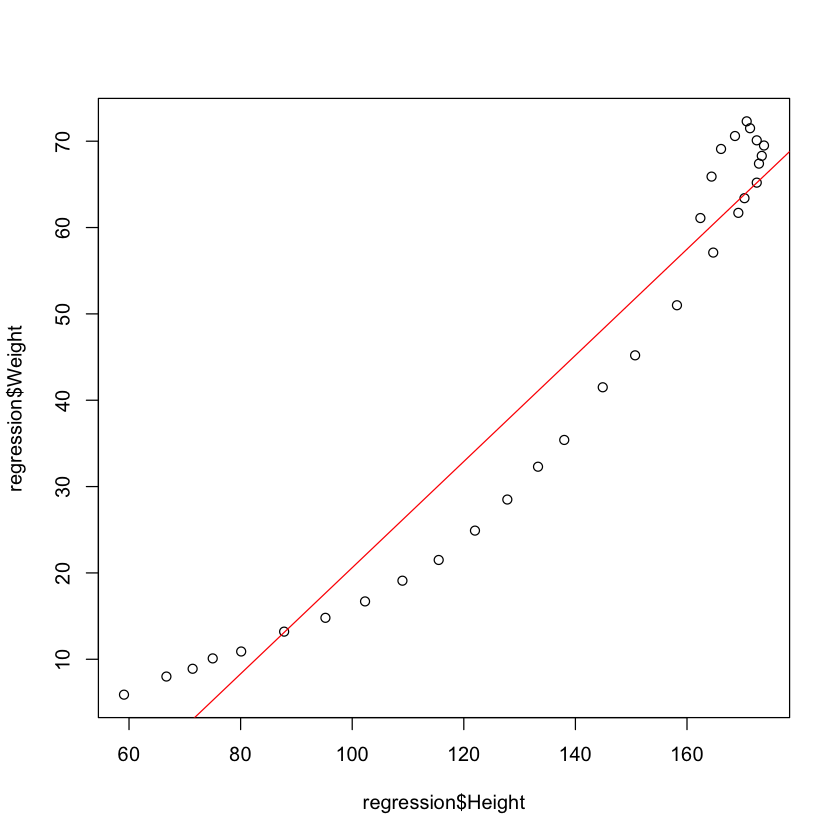

In [10]:
plot(regression$Weight ~ regression$Height)

# 회귀선 (중심선, 평균선)
r <- lm(regression$Weight ~ regression$Height)
abline(r, col="red") # 최적의 공식을 가지고 선을 만들어줌

In [11]:
# 분석결과
options(scipen = 100)
summary(r)


Call:
lm(formula = regression$Weight ~ regression$Height)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.2327 -5.9811  0.0915  5.3125 10.4346 

Coefficients:
                   Estimate Std. Error t value             Pr(>|t|)    
(Intercept)       -40.86594    4.22768  -9.666       0.000000000142 ***
regression$Height   0.61474    0.02998  20.508 < 0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.355 on 29 degrees of freedom
Multiple R-squared:  0.9355,	Adjusted R-squared:  0.9333 
F-statistic: 420.6 on 1 and 29 DF,  p-value: < 0.00000000000000022


p-value: < 2.2e-16 < 0.05 <br>
Adjusted R-squared:  0.9333 <- 예측력 <br>
Residual standard error: 6.355 <- RSE 표준오차*** <br>

In [12]:
# Coefficients*
# *** : 절대표시 중요함

In [13]:
# 회귀식

r


Call:
lm(formula = regression$Weight ~ regression$Height)

Coefficients:
      (Intercept)  regression$Height  
         -40.8659             0.6147  


In [14]:
# 키가 170인 사람의 몸무게
hei <- 0.6147 * 170 + (-40.8659)

# 표준 오차를 적용한 키가 170인 사람의 몸무게 
cat(hei-6.355, "~", hei+6.355)


57.2781 ~ 69.9881

---
# IQ

In [17]:
iq02 <- read.csv("../Data/IQ.csv")

iq02

이름,성적,IQ,다니는.학원수,게임하는.시간,TV시청.시간
A,90,140,2,1,0
B,75,125,1,3,3
C,77,120,1,0,4
D,83,135,2,3,2
E,65,105,0,4,4
F,80,123,3,1,1
G,83,132,3,4,1
H,70,115,1,1,3
I,87,128,4,0,0
J,79,131,2,2,3


In [18]:
# iq가 126인 사람의 성적을 예측해 보시오

str(iq02)

'data.frame':	10 obs. of  6 variables:
 $ 이름         : Factor w/ 10 levels "A","B","C","D",..: 1 2 3 4 5 6 7 8 9 10
 $ 성적         : int  90 75 77 83 65 80 83 70 87 79
 $ IQ           : int  140 125 120 135 105 123 132 115 128 131
 $ 다니는.학원수: int  2 1 1 2 0 3 3 1 4 2
 $ 게임하는.시간: int  1 3 0 3 4 1 4 1 0 2
 $ TV시청.시간  : int  0 3 4 2 4 1 1 3 0 3


In [19]:
summary(iq02)

      이름        성적            IQ        다니는.학원수  게임하는.시간
 A      :1   Min.   :65.0   Min.   :105.0   Min.   :0.00   Min.   :0.0  
 B      :1   1st Qu.:75.5   1st Qu.:120.8   1st Qu.:1.00   1st Qu.:1.0  
 C      :1   Median :79.5   Median :126.5   Median :2.00   Median :1.5  
 D      :1   Mean   :78.9   Mean   :125.4   Mean   :1.90   Mean   :1.9  
 E      :1   3rd Qu.:83.0   3rd Qu.:131.8   3rd Qu.:2.75   3rd Qu.:3.0  
 F      :1   Max.   :90.0   Max.   :140.0   Max.   :4.00   Max.   :4.0  
 (Other):4                                                              
  TV시청.시간 
 Min.   :0.0  
 1st Qu.:1.0  
 Median :2.5  
 Mean   :2.1  
 3rd Qu.:3.0  
 Max.   :4.0  
              

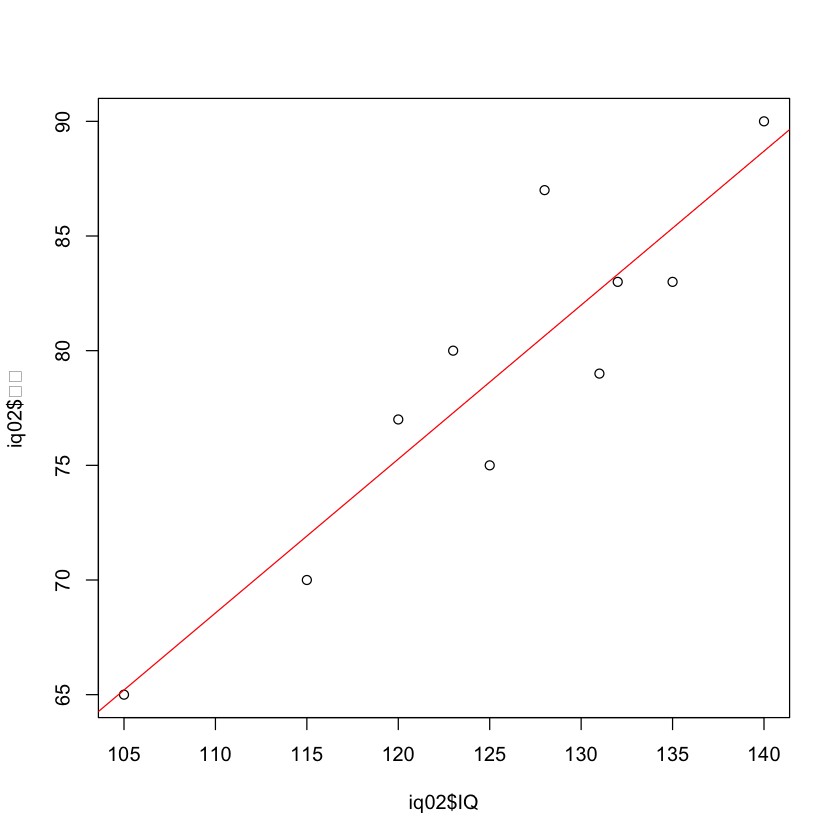

In [21]:
options(warn = -1)
plot(iq02$IQ, iq02$성적)

iq <- lm(iq02$성적 ~  iq02$IQ)
abline(iq, col='red')


In [22]:
cor(iq02$성적, iq02$IQ)

[1] 0.9102242

In [23]:
summary(iq)


Call:
lm(formula = iq02$성적 ~ iq02$IQ)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6598 -2.2384 -0.2674  1.6186  6.3544 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -5.2918    13.5832  -0.390 0.707007    
iq02$IQ       0.6714     0.1080   6.217 0.000255 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.322 on 8 degrees of freedom
Multiple R-squared:  0.8285,	Adjusted R-squared:  0.8071 
F-statistic: 38.65 on 1 and 8 DF,  p-value: 0.0002547


In [24]:
iq


Call:
lm(formula = iq02$성적 ~ iq02$IQ)

Coefficients:
(Intercept)      iq02$IQ  
    -5.2918       0.6714  


In [36]:
# Intercept가 ***을 가지지 않기 때문에 b값을 가지지 않는다.
#

iq126 <- 0.6714*126

cat(iq126-3.322, "~", iq126+3.322)

81.2744 ~ 87.9184

In [37]:
# 성적과 관련이 깊은 항목은 ? (상관계수)
# iq..
cor(iq02$성적, iq02$IQ)
cor(iq02$성적, iq02$다니는.학원수)
cor(iq02$성적, iq02$게임하는.시간)
cor(iq02$성적, iq02$TV시청.시간)

[1] 0.9102242

[1] 0.7840514

[1] -0.3383549

[1] -0.8473333

[1] 0.7840514

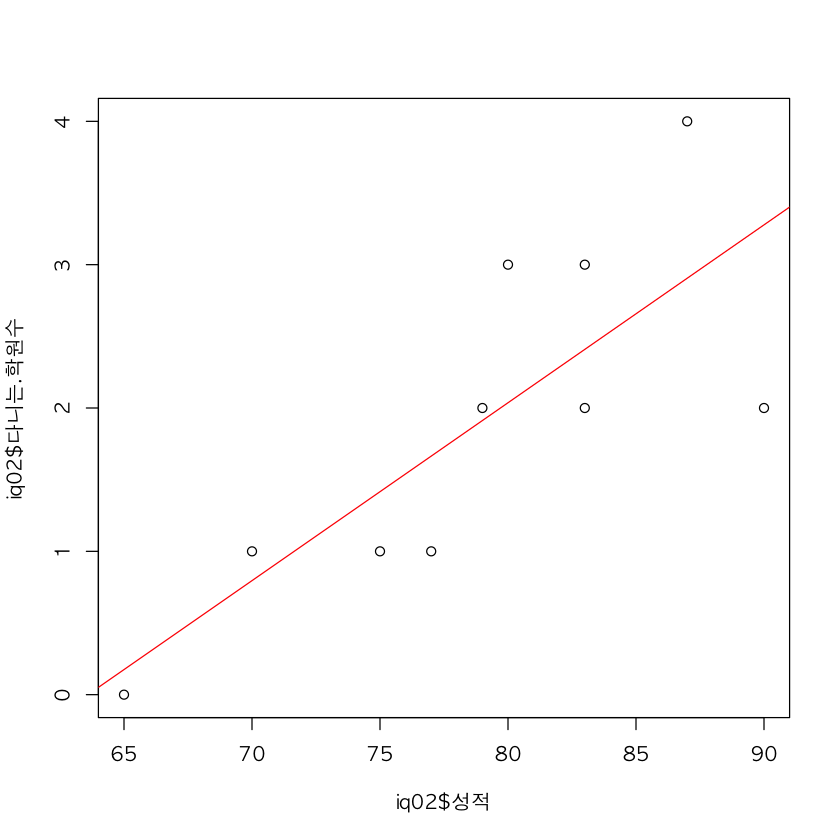

In [38]:
# 학원을 몇군데 다녀야 성적이 90점 이상이 될까?

par(family = "AppleGothic")
cor(iq02$다니는.학원수, iq02$성적)

plot(iq02$다니는.학원수 ~ iq02$성적)

score <- lm(iq02$다니는.학원수 ~ iq02$성적)
abline(score, col='red')

In [39]:
summary(score)


Call:
lm(formula = iq02$다니는.학원수 ~ iq02$성적)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2775 -0.4142 -0.0437  0.4945  1.0948 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) -7.89163    2.75190  -2.868  0.02090 * 
iq02$성적    0.12410    0.03473   3.573  0.00726 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7882 on 8 degrees of freedom
Multiple R-squared:  0.6147,	Adjusted R-squared:  0.5666 
F-statistic: 12.77 on 1 and 8 DF,  p-value: 0.007264


In [40]:
score


Call:
lm(formula = iq02$다니는.학원수 ~ iq02$성적)

Coefficients:
(Intercept)    iq02$성적  
    -7.8916       0.1241  


In [41]:
y <- 90*(0.1241)+(-7.8916)
y

[1] 3.2774

In [42]:
cat(y-0.7882, "~", y+0.7882)

2.4892 ~ 4.0656

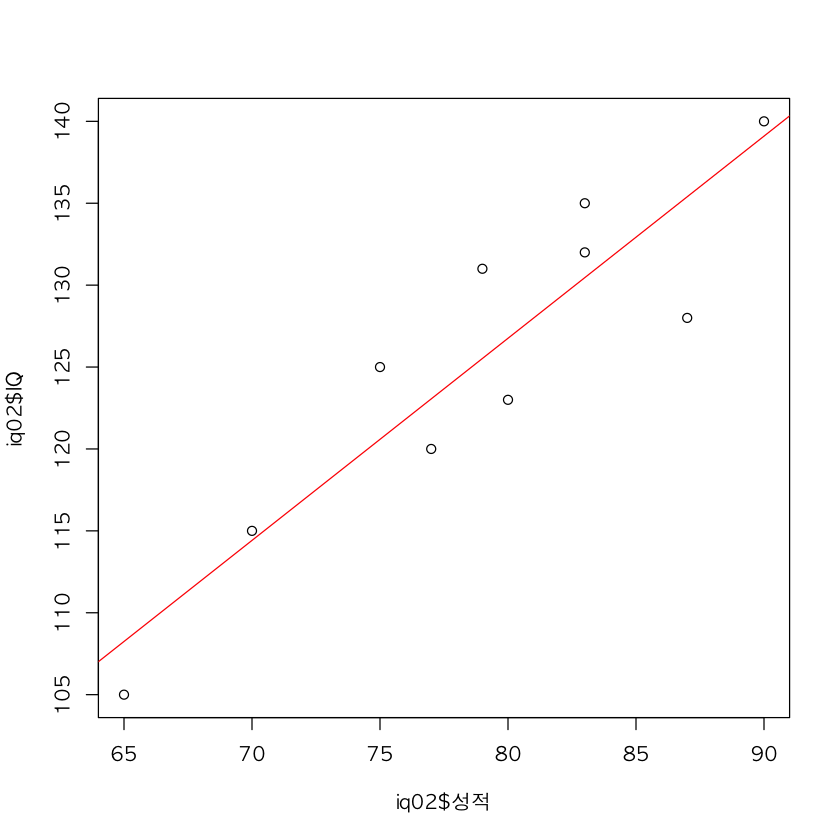

In [43]:
# 성적이 85점이라면 IQ는 얼마?
par(family = "AppleGothic")

plot(iq02$IQ ~ iq02$성적)
iq85 <- lm(iq02$IQ ~ iq02$성적)
abline(iq85, col='red')

In [44]:
summary(iq85)


Call:
lm(formula = iq02$IQ ~ iq02$성적)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.3956 -3.1991  0.7426  3.6946  5.4766 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  28.0353    15.7260   1.783 0.112480    
iq02$성적     1.2340     0.1985   6.217 0.000255 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.504 on 8 degrees of freedom
Multiple R-squared:  0.8285,	Adjusted R-squared:  0.8071 
F-statistic: 38.65 on 1 and 8 DF,  p-value: 0.0002547


In [45]:
iq85


Call:
lm(formula = iq02$IQ ~ iq02$성적)

Coefficients:
(Intercept)    iq02$성적  
     28.035        1.234  


In [46]:
resultIq <- 1.234*85 + 28.035

In [47]:
cat(resultIq-4.504, "~", resultIq+4.504)

128.421 ~ 137.429

---
# 다중 회귀 분석
- 여러개의 항목들로 구성된 식으로 에측하는 방법


### attitude
- 대형 금융기관의 사무직 대상으로 진급의 요소에 대한 설문조사 30개부서(무작위) 약 35명을 대상으로 한 설문지 데이터
- 각 수치는 부서의 7개 질문에 대한 점수를 나타낸다.

In [48]:
help(attitude)

In [49]:
head(attitude)

rating,complaints,privileges,learning,raises,critical,advance
43,51,30,39,61,92,45
63,64,51,54,63,73,47
71,70,68,69,76,86,48
61,63,45,47,54,84,35
81,78,56,66,71,83,47
43,55,49,44,54,49,34


In [50]:
tail(attitude)

,rating,complaints,privileges,learning,raises,critical,advance
25,63,54,42,48,66,75,33
26,66,77,66,63,88,76,72
27,78,75,58,74,80,78,49
28,48,57,44,45,51,83,38
29,85,85,71,71,77,74,55
30,82,82,39,59,64,78,39


In [51]:
str(attitude)

'data.frame':	30 obs. of  7 variables:
 $ rating    : num  43 63 71 61 81 43 58 71 72 67 ...
 $ complaints: num  51 64 70 63 78 55 67 75 82 61 ...
 $ privileges: num  30 51 68 45 56 49 42 50 72 45 ...
 $ learning  : num  39 54 69 47 66 44 56 55 67 47 ...
 $ raises    : num  61 63 76 54 71 54 66 70 71 62 ...
 $ critical  : num  92 73 86 84 83 49 68 66 83 80 ...
 $ advance   : num  45 47 48 35 47 34 35 41 31 41 ...


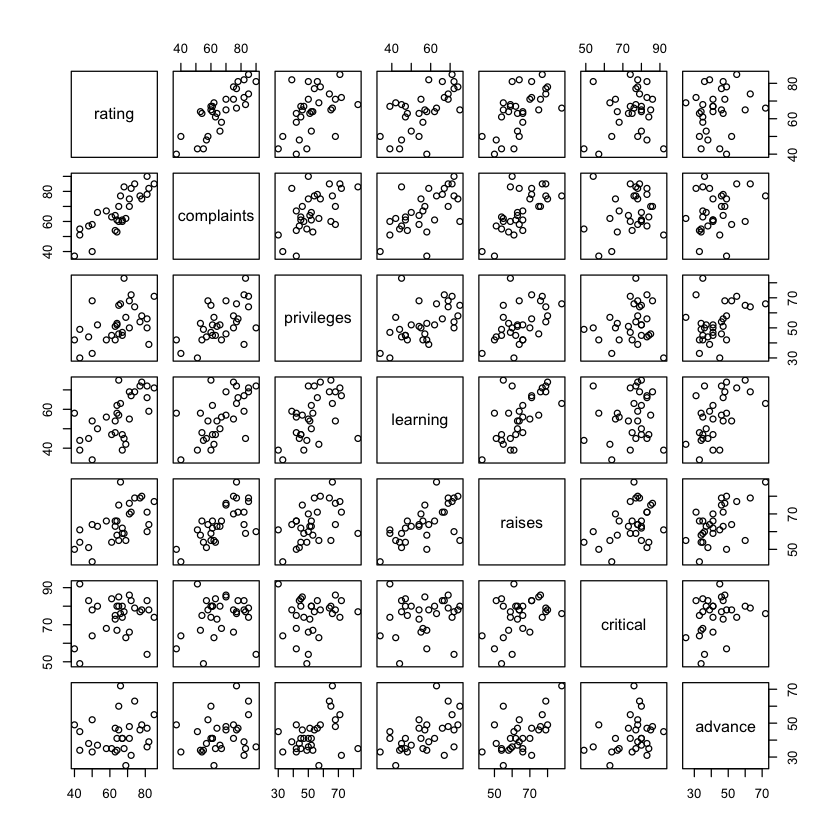

In [52]:
plot(attitude)

In [53]:
# 회귀분석 # . : 앞의 데이터를 제외한 전부*** 
model <- lm(rating ~ . , data = attitude)
model


Call:
lm(formula = rating ~ ., data = attitude)

Coefficients:
(Intercept)   complaints   privileges     learning       raises     critical  
   10.78708      0.61319     -0.07305      0.32033      0.08173      0.03838  
    advance  
   -0.21706  


rating = 0.61319 * complaints + (-0.07305) * privileges + ... + 10.78708

In [54]:
# Model 검토
summary(model)


Call:
lm(formula = rating ~ ., data = attitude)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.9418  -4.3555   0.3158   5.5425  11.5990 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.78708   11.58926   0.931 0.361634    
complaints   0.61319    0.16098   3.809 0.000903 ***
privileges  -0.07305    0.13572  -0.538 0.595594    
learning     0.32033    0.16852   1.901 0.069925 .  
raises       0.08173    0.22148   0.369 0.715480    
critical     0.03838    0.14700   0.261 0.796334    
advance     -0.21706    0.17821  -1.218 0.235577    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.068 on 23 degrees of freedom
Multiple R-squared:  0.7326,	Adjusted R-squared:  0.6628 
F-statistic:  10.5 on 6 and 23 DF,  p-value: 0.0000124


> Adjusted R-squared:  0.6628

In [55]:
cor(attitude)

,rating,complaints,privileges,learning,raises,critical,advance
rating,1.0000000,0.8254176,0.4261169,0.6236782,0.5901390,0.1564392,0.1550863
complaints,0.8254176,1.0000000,0.5582882,0.5967358,0.6691975,0.1877143,0.2245796
privileges,0.4261169,0.5582882,1.0000000,0.4933310,0.4454779,0.1472331,0.3432934
learning,0.6236782,0.5967358,0.4933310,1.0000000,0.6403144,0.1159652,0.5316198
raises,0.5901390,0.6691975,0.4454779,0.6403144,1.0000000,0.3768830,0.5741862
critical,0.1564392,0.1877143,0.1472331,0.1159652,0.3768830,1.0000000,0.2833432
advance,0.1550863,0.2245796,0.3432934,0.5316198,0.5741862,0.2833432,1.0000000


In [56]:
# 예측력을 높이기 위해 상대적으로 기여도가 낮은 변수를 제거

reduced <- step(model, direction = "backward")

Start:  AIC=123.36
rating ~ complaints + privileges + learning + raises + critical + 
    advance

             Df Sum of Sq    RSS    AIC
- critical    1      3.41 1152.4 121.45
- raises      1      6.80 1155.8 121.54
- privileges  1     14.47 1163.5 121.74
- advance     1     74.11 1223.1 123.24
<none>                    1149.0 123.36
- learning    1    180.50 1329.5 125.74
- complaints  1    724.80 1873.8 136.04

Step:  AIC=121.45
rating ~ complaints + privileges + learning + raises + advance

             Df Sum of Sq    RSS    AIC
- raises      1     10.61 1163.0 119.73
- privileges  1     14.16 1166.6 119.82
- advance     1     71.27 1223.7 121.25
<none>                    1152.4 121.45
- learning    1    177.74 1330.1 123.75
- complaints  1    724.70 1877.1 134.09

Step:  AIC=119.73
rating ~ complaints + privileges + learning + advance

             Df Sum of Sq    RSS    AIC
- privileges  1     16.10 1179.1 118.14
- advance     1     61.60 1224.6 119.28
<none>                  

In [57]:
summary(reduced)


Call:
lm(formula = rating ~ complaints + learning, data = attitude)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.5568  -5.7331   0.6701   6.5341  10.3610 

Coefficients:
            Estimate Std. Error t value   Pr(>|t|)    
(Intercept)   9.8709     7.0612   1.398      0.174    
complaints    0.6435     0.1185   5.432 0.00000957 ***
learning      0.2112     0.1344   1.571      0.128    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.817 on 27 degrees of freedom
Multiple R-squared:  0.708,	Adjusted R-squared:  0.6864 
F-statistic: 32.74 on 2 and 27 DF,  p-value: 0.00000006058


> Adjusted R-squared:  0.6864 

In [58]:
# 관련없는 데이터 삭제 후 예측력 수치가 0.66에서 0.68로 상승함

reduced


Call:
lm(formula = rating ~ complaints + learning, data = attitude)

Coefficients:
(Intercept)   complaints     learning  
     9.8709       0.6435       0.2112  


---
# iris에 대한 다중 회귀분석

In [59]:
Species <- lm(as.numeric(Species) ~ . , data = iris)
Species

str(iris)


Call:
lm(formula = as.numeric(Species) ~ ., data = iris)

Coefficients:
 (Intercept)  Sepal.Length   Sepal.Width  Petal.Length   Petal.Width  
     1.18650      -0.11191      -0.04008       0.22865       0.60925  


'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [60]:
summary(iris)
summary(Species)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                


Call:
lm(formula = as.numeric(Species) ~ ., data = iris)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.59215 -0.15368  0.01268  0.11089  0.55077 

Coefficients:
             Estimate Std. Error t value      Pr(>|t|)    
(Intercept)   1.18650    0.20484   5.792 0.00000004150 ***
Sepal.Length -0.11191    0.05765  -1.941        0.0542 .  
Sepal.Width  -0.04008    0.05969  -0.671        0.5030    
Petal.Length  0.22865    0.05685   4.022 0.00009255215 ***
Petal.Width   0.60925    0.09446   6.450 0.00000000156 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2191 on 145 degrees of freedom
Multiple R-squared:  0.9304,	Adjusted R-squared:  0.9285 
F-statistic: 484.5 on 4 and 145 DF,  p-value: < 0.00000000000000022


In [61]:
cor(iris)

ERROR: Error in cor(iris): 'x' must be numeric


In [62]:
reduced <- step(Species, direction = "backward")

Start:  AIC=-450.56
as.numeric(Species) ~ Sepal.Length + Sepal.Width + Petal.Length + 
    Petal.Width

               Df Sum of Sq    RSS     AIC
- Sepal.Width   1   0.02164 6.9823 -452.09
<none>                      6.9606 -450.56
- Sepal.Length  1   0.18090 7.1415 -448.71
- Petal.Length  1   0.77649 7.7371 -436.69
- Petal.Width   1   1.99710 8.9577 -414.72

Step:  AIC=-452.09
as.numeric(Species) ~ Sepal.Length + Petal.Length + Petal.Width

               Df Sum of Sq    RSS     AIC
<none>                      6.9823 -452.09
- Sepal.Length  1   0.44324 7.4255 -444.86
- Petal.Length  1   1.51946 8.5017 -424.56
- Petal.Width   1   2.11632 9.0986 -414.38


In [63]:
summary(reduced)


Call:
lm(formula = as.numeric(Species) ~ Sepal.Length + Petal.Length + 
    Petal.Width, data = iris)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.60753 -0.16188  0.01367  0.11217  0.54740 

Coefficients:
             Estimate Std. Error t value       Pr(>|t|)    
(Intercept)   1.14469    0.19478   5.877 0.000000027233 ***
Sepal.Length -0.13624    0.04475  -3.044        0.00277 ** 
Petal.Length  0.25213    0.04473   5.637 0.000000086707 ***
Petal.Width   0.58689    0.08822   6.652 0.000000000541 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2187 on 146 degrees of freedom
Multiple R-squared:  0.9302,	Adjusted R-squared:  0.9287 
F-statistic: 648.3 on 3 and 146 DF,  p-value: < 0.00000000000000022
